# Sustainable Transport Choice Prediction

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV , KFold , StratifiedKFold , cross_val_score
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix , classification_report

In [3]:
# Load The Dataset

In [4]:
dataset = pd.read_csv(r"C:\Users\siddi\Desktop\ML Projects\mumbai_travel_survey_5000_40pct_students_1pctnull_whole.csv")

In [5]:
dataset.head()

,Age,Gender,Trip Distance (in km),Travel Time (in Minutes),Travel Cost (Monthly INR),Vehicles in Household,Public Transport Available,Cost Sensitivity,Comfort Preference,Environmental Concern,Occupation,Mode
0,21.0,Male,6.5,18.0,1950.0,1.0,Yes,Low,Low,Low,Student,Metro
1,58.0,Female,17.3,47.0,19030.0,2.0,No,NaN,High,Medium,Retired,Car
2,21.0,Male,4.4,12.0,2860.0,1.0,Yes,Medium,Medium,Low,Worker,Auto
3,22.0,Female,8.9,19.0,2670.0,1.0,Yes,Medium,Medium,Medium,Student,Metro
4,57.0,Female,2.5,6.0,2750.0,1.0,Yes,Low,Medium,Medium,Professional,Car


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4941 non-null   float64
 1   Gender                      4947 non-null   object 
 2   Trip Distance (in km)       4950 non-null   float64
 3   Travel Time (in Minutes)    4940 non-null   float64
 4   Travel Cost (Monthly INR)   4945 non-null   float64
 5   Vehicles in Household       4957 non-null   float64
 6   Public Transport Available  4947 non-null   object 
 7   Cost Sensitivity            4961 non-null   object 
 8   Comfort Preference          4960 non-null   object 
 9   Environmental Concern       4961 non-null   object 
 10  Occupation                  4954 non-null   object 
 11  Mode                        4941 non-null   object 
dtypes: float64(5), object(7)
memory usage: 468.9+ KB


In [7]:
dataset.columns

Index(['Age', 'Gender', 'Trip Distance (in km)', 'Travel Time (in Minutes)',
       'Travel Cost (Monthly INR)', 'Vehicles in Household',
       'Public Transport Available', 'Cost Sensitivity', 'Comfort Preference',
       'Environmental Concern', 'Occupation', 'Mode'],
      dtype='object')

In [8]:
dataset['Occupation'].unique()

array(['Student', 'Retired', 'Worker', 'Professional', nan], dtype=object)

In [9]:
dataset.shape

(5000, 12)

# 1 - Data Cleaning

In [10]:
# Removing Duplicate Rows

In [11]:
dataset.duplicated().sum()

2

In [12]:
# Handling And Filling Null Values With Mean And Mode

In [13]:
dataset.isnull().sum()

Age                           59
Gender                        53
Trip Distance (in km)         50
Travel Time (in Minutes)      60
Travel Cost (Monthly INR)     55
Vehicles in Household         43
Public Transport Available    53
Cost Sensitivity              39
Comfort Preference            40
Environmental Concern         39
Occupation                    46
Mode                          59
dtype: int64

In [14]:
# filling numeric columns with mean

In [15]:
for col in dataset.select_dtypes(include=['int64','float64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

In [16]:
# Filling chategorical Data with Mode

In [17]:
for Col in dataset.select_dtypes(include=['object']).columns:
    dataset[Col] = dataset[Col].fillna(dataset[Col].mode()[0])

In [18]:
# Removing Outliers

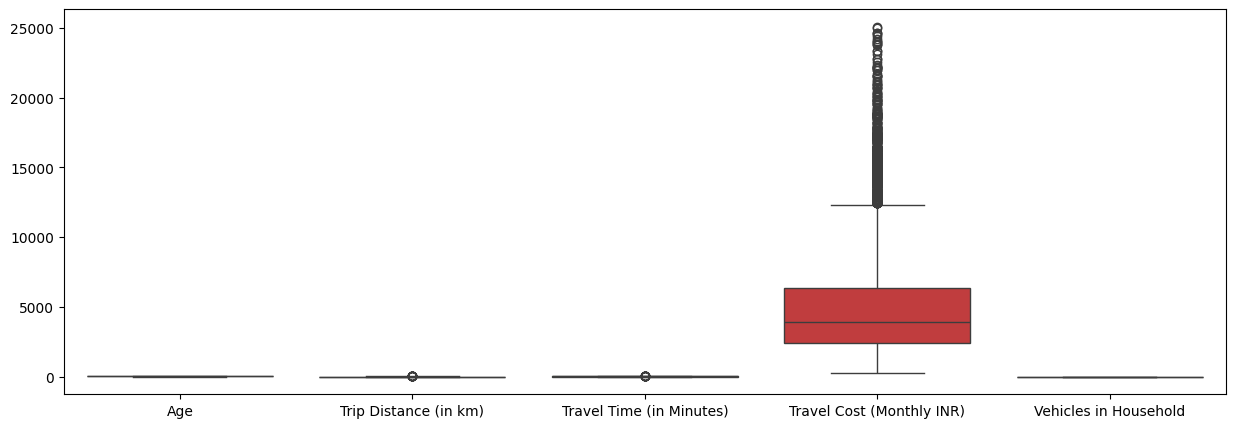

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dataset[['Age', 'Trip Distance (in km)', 'Travel Time (in Minutes)',
'Travel Cost (Monthly INR)', 'Vehicles in Household']])
plt.show()

In [20]:
# Removing Outliers

In [21]:
q1 = dataset["Travel Cost (Monthly INR)"].quantile(0.25)
q3 = dataset["Travel Cost (Monthly INR)"].quantile(0.75)

IQR = q3 - q1

min_range = q1 - (IQR * 1.3)
max_range = q3 + (IQR * 1.3)
dataset["Travel Cost (Monthly INR)"] = np.where(dataset["Travel Cost (Monthly INR)"] > min_range , dataset["Travel Cost (Monthly INR)"] , min_range)
dataset["Travel Cost (Monthly INR)"] = np.where(dataset["Travel Cost (Monthly INR)"] < max_range , dataset["Travel Cost (Monthly INR)"] , max_range)
# dataset["Travel Cost (Monthly INR)"] = np.log1p(dataset["Travel Cost (Monthly INR)"])
# print("Travel Cost (Monthly INR) Capped & Log-Transformed")

In [22]:
colums = ['Age', 'Trip Distance (in km)', 'Travel Time (in Minutes)',
'Travel Cost (Monthly INR)', 'Vehicles in Household']

In [23]:
# for colum in colums:
#     q1 = dataset[colum].quantile(0.25)
#     q3 = dataset[colum].quantile(0.75)

#     IQR = q3 - q1

#     min_range = q1 - (IQR * 1.3)
#     max_range = q3 + (IQR * 1.3)
#     dataset[colum] = np.where(dataset[colum] > min_range , dataset[colum] , min_range)
#     dataset[colum] = np.where(dataset[colum] < max_range , dataset[colum] , max_range)
#     # dataset[colum] = np.log1p(dataset[colum])
#     print(f"{colum} Capped & Log-Transformed")
    

In [24]:
dataset["Vehicles in Household"].value_counts()

Vehicles in Household
1.000000    2446
2.000000    1232
0.000000    1032
3.000000     247
1.140004      43
Name: count, dtype: int64

In [25]:
dataset["Vehicles in Household"] = dataset["Vehicles in Household"].astype('int64')
dataset["Age"] = dataset["Age"].astype('int64')

In [26]:
dataset["Vehicles in Household"].value_counts()

Vehicles in Household
1    2489
2    1232
0    1032
3     247
Name: count, dtype: int64

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Gender                      5000 non-null   object 
 2   Trip Distance (in km)       5000 non-null   float64
 3   Travel Time (in Minutes)    5000 non-null   float64
 4   Travel Cost (Monthly INR)   5000 non-null   float64
 5   Vehicles in Household       5000 non-null   int64  
 6   Public Transport Available  5000 non-null   object 
 7   Cost Sensitivity            5000 non-null   object 
 8   Comfort Preference          5000 non-null   object 
 9   Environmental Concern       5000 non-null   object 
 10  Occupation                  5000 non-null   object 
 11  Mode                        5000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 468.9+ KB


In [28]:
# Spliting The Data into Train and Test

In [29]:
x = dataset.iloc[:,:-1]
y = dataset["Mode"]

In [30]:
X_train , X_test , Y_train , Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Encoding Chategoriacl Data

In [32]:
chategorical_columns = X_train.select_dtypes(include=['object']).columns

In [33]:
ord_encoder = OrdinalEncoder()

In [34]:
x_train_encoded = ord_encoder.fit_transform(X_train[chategorical_columns])
x_train_df = pd.DataFrame(x_train_encoded, columns=chategorical_columns , index=X_train.index)

In [35]:
x_test_encoded = ord_encoder.transform(X_test[chategorical_columns])
x_test_df = pd.DataFrame(x_test_encoded, columns=chategorical_columns, index=X_test.index)

In [36]:
x_train = pd.concat([X_train.drop(columns=chategorical_columns,axis=1),x_train_df],axis=1)
x_test = pd.concat([X_test.drop(columns=chategorical_columns,axis=1),x_test_df],axis=1)

In [37]:
# Scaling Numeric Data

In [38]:
numeric_column = X_train.select_dtypes(include=['int64','float64']).columns

In [39]:
scalar = StandardScaler()
x_train[numeric_column] = scalar.fit_transform(x_train[numeric_column])
x_test[numeric_column] = scalar.transform(x_test[numeric_column])

In [40]:
# Encoding OutPut Features

In [41]:
label_encoder = LabelEncoder()

In [42]:
y_train = label_encoder.fit_transform(Y_train)
y_test = label_encoder.transform(Y_test)

# Model Prediction 

In [43]:
# Model Training

In [44]:
value , count = np.unique(y_train, return_counts=True)
before_value_count =  dict(zip(value, count))

In [45]:
# Balancing The Class Distrbution

In [46]:
sm = SMOTE(random_state=42)
x_train_final , y_train_final = sm.fit_resample(x_train , y_train)

In [47]:
value2 , count2 = np.unique(y_train_final , return_counts=True)
after_value_count = dict(zip(value2 ,count2))

In [48]:
print(f"Before Balancing The Class Distribution : \n{before_value_count}")
print(f"After Balancing The Class Distribution : \n{after_value_count}")

Before Balancing The Class Distribution : 
{0: 430, 1: 290, 2: 631, 3: 1021, 4: 1628}
After Balancing The Class Distribution : 
{0: 1628, 1: 1628, 2: 1628, 3: 1628, 4: 1628}


In [49]:
# Models

In [50]:
models = {

    "Logistic Regression":LogisticRegression(solver='saga', max_iter=3000),
    "SVC":SVC(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":xgb.XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoost":GradientBoostingClassifier(),
}

In [51]:
for name ,  model in models.items():
    model.fit(x_train_final , y_train_final)
    y_pred = model.predict(x_test)
    print(f"{name} | Accuracy Score  : {accuracy_score(y_pred,y_test)*100:.3f}")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model , x_train_final , y_train_final , cv=cv , scoring='accuracy')
    print(f"{name} | Mean Accuracy Score After CV : {np.mean(scores)*100:.3f}\n")

Logistic Regression | Accuracy Score  : 94.900
Logistic Regression | Mean Accuracy Score After CV : 95.811

SVC | Accuracy Score  : 96.600
SVC | Mean Accuracy Score After CV : 96.941

KNN | Accuracy Score  : 79.700
KNN | Mean Accuracy Score After CV : 90.012

Decision Tree | Accuracy Score  : 95.900
Decision Tree | Mean Accuracy Score After CV : 97.015

Random Forest | Accuracy Score  : 97.500
Random Forest | Mean Accuracy Score After CV : 98.735

XGBoost | Accuracy Score  : 98.100
XGBoost | Mean Accuracy Score After CV : 99.214

AdaBoost | Accuracy Score  : 75.000
AdaBoost | Mean Accuracy Score After CV : 72.813

GradientBoost | Accuracy Score  : 98.000
GradientBoost | Mean Accuracy Score After CV : 98.808



In [52]:
# Training the Best Model

In [53]:
best_model = xgb.XGBClassifier(
    objective='multi:softprob',  # for multi-class
    num_class=len(np.unique(y_train)),  # auto set number of classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    subsample = 0.7777777777777778,
    reg_lambda = 4.0,
    reg_alpha = 0.8888888888888888,
    n_estimators = 100,
    min_child_weight = 1,
    max_depth = 5,
    learning_rate = 0.20842105263157895,
    gamma = 0.0,
    colsample_bytree = 0.9444444444444444
)

In [54]:
best_model.fit(x_train_final , y_train_final)
y_pred = best_model.predict(x_test)

C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
# Model Evaluation

In [56]:
print("Training Score : ",round(best_model.score(x_train_final , y_train_final)*100,3))
print("Testing Score : ",best_model.score(x_test , y_test)*100)
print("Accuracy Score :",accuracy_score(y_pred,y_test)*100)
print("Recall Score :",round(recall_score(y_pred,y_test,average='macro')*100,3))
print("Precsion Score :",round(precision_score(y_pred,y_test, average='macro')*100,3))
print("F1 Score :",round(f1_score(y_pred,y_test, average='macro')*100,3))

Training Score :  99.73
Testing Score :  97.89999999999999
Accuracy Score : 97.89999999999999
Recall Score : 97.027
Precsion Score : 98.207
F1 Score : 97.584


In [57]:
# Hyperparameter Tuning

In [58]:
param_dist = {
    'n_estimators': np.arange(100, 600, 50),
    'max_depth': np.arange(3, 12, 1),
    'learning_rate': np.linspace(0.01, 0.3, 20),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'gamma': np.linspace(0, 5, 10),
    'min_child_weight': np.arange(1, 10, 1),
    'reg_alpha': np.linspace(0, 2, 10),
    'reg_lambda': np.linspace(0.5, 5, 10)
}

In [59]:
# Stratified K-Fold for better multi-class validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [60]:
# Random Search
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=param_dist,
    n_iter=50,                # number of random combinations
    scoring='accuracy',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

In [61]:
# Fit search
# random_search.fit(x_train_final, y_train_final)

In [62]:
# random_search.best_score_*100

In [63]:
# random_search.best_params_

In [64]:
# Confusion Matrix

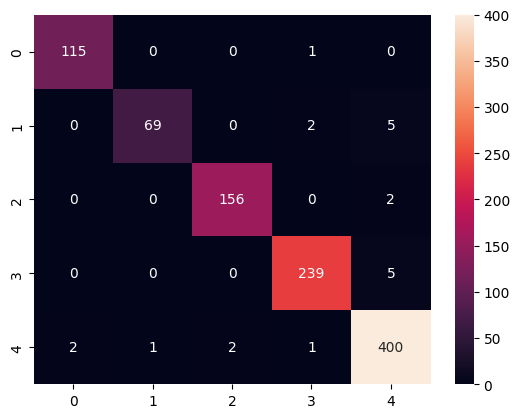

In [65]:
cm = confusion_matrix(y_pred , y_test)
sns.heatmap(data=cm, annot=True , fmt='g')
plt.show()

In [66]:
# Final Model

In [67]:
final_model = xgb.XGBClassifier(
    objective='multi:softprob',  # for multi-class
    num_class=len(np.unique(y_train)),  # auto set number of classes
    eval_metric='mlogloss',
    random_state=42,
    subsample = 0.7777777777777778,
    reg_lambda = 4.0,
    reg_alpha = 0.8888888888888888,
    n_estimators = 100,
    min_child_weight = 1,
    max_depth = 5,
    learning_rate = 0.20842105263157895,
    gamma = 0.0,
    colsample_bytree = 0.9444444444444444
)

In [68]:
final_model.fit(x_train_final , y_train_final)
y_pred = final_model.predict(x_test)

In [69]:
print(f"Accuracy of final Model : {accuracy_score(y_pred, y_test)*100}%")
print(f"F1 - Score Of Final Model : {round(f1_score(y_pred , y_test, average='macro'),3)*100}%")

Accuracy of final Model : 97.89999999999999%
F1 - Score Of Final Model : 97.6%


In [70]:
# Save The model , encoder , scalar

In [71]:
joblib.dump(final_model,"transport_choice_prd.pkl")
joblib.dump(ord_encoder, "transport_choice_ord_encoder.pkl")
joblib.dump(label_encoder, "transport_choice_label_encoder.pkl")
joblib.dump(scalar, "transport_choice_scalar.pkl")

['transport_choice_scalar.pkl']

In [72]:
input_data = [[21,'Male',10.8,22,1782.000,0,'Yes','Low','Medium','Medium','Student']]

input_df = pd.DataFrame(input_data, columns=X_test.columns)

chategorical_colums = input_df.select_dtypes(include=['object','bool']).columns

input_encoded = ord_encoder.transform(input_df[chategorical_colums])
enc_df = pd.DataFrame(input_encoded,columns=chategorical_columns,index=input_df.index)

final_input = pd.concat([input_df.drop(columns=chategorical_columns,axis=1),enc_df],axis=1)
numeric_colums = input_df.select_dtypes(include=["int64","float64"]).columns
final_input[numeric_column] = scalar.transform(final_input[numeric_colums])

final_input

,Age,Trip Distance (in km),Travel Time (in Minutes),Travel Cost (Monthly INR),Vehicles in Household,Gender,Public Transport Available,Cost Sensitivity,Comfort Preference,Environmental Concern,Occupation
0,-0.942069,0.181957,-0.314259,-0.919408,-1.418779,1.0,1.0,1.0,2.0,2.0,2.0


In [73]:
final_model.predict(final_input)

array([4], dtype=int64)

In [74]:
X_test

,Age,Gender,Trip Distance (in km),Travel Time (in Minutes),Travel Cost (Monthly INR),Vehicles in Household,Public Transport Available,Cost Sensitivity,Comfort Preference,Environmental Concern,Occupation
1501,20,Male,8.1,31.0,2025.0,3,Yes,Medium,Medium,Medium,Student
2586,43,Male,8.0,17.0,3600.0,0,Yes,Low,Medium,High,Professional
2653,39,Male,10.8,21.0,11539.3,0,Yes,Medium,High,High,Professional
1055,23,Male,4.9,21.0,1225.0,1,No,Low,High,Medium,Student
705,59,Female,9.1,22.0,10010.0,2,Yes,High,Medium,High,Retired
...,...,...,...,...,...,...,...,...,...,...,...
4711,22,Male,6.9,14.0,2070.0,2,Yes,Medium,Medium,High,Student
2313,48,Female,14.1,51.0,3525.0,0,Yes,Medium,Low,High,Worker
3214,18,Female,10.2,28.0,3060.0,0,Yes,Medium,Medium,Low,Student
2732,25,Male,13.8,32.0,11539.3,1,Yes,High,Medium,Medium,Professional


In [75]:
x_test.head(5)

,Age,Trip Distance (in km),Travel Time (in Minutes),Travel Cost (Monthly INR),Vehicles in Household,Gender,Public Transport Available,Cost Sensitivity,Comfort Preference,Environmental Concern,Occupation
1501,-1.007290,-0.375404,0.365572,-0.847254,2.332951,1.0,1.0,2.0,2.0,2.0,2.0
2586,0.492794,-0.396047,-0.691943,-0.379591,-1.418779,1.0,1.0,1.0,2.0,0.0,0.0
2653,0.231910,0.181957,-0.389796,1.977819,-1.418779,1.0,1.0,2.0,0.0,0.0,0.0
1055,-0.811627,-1.035980,-0.389796,-1.084798,-0.168203,1.0,0.0,1.0,0.0,2.0,2.0
705,1.536330,-0.168974,-0.314259,1.523725,1.082374,0.0,1.0,0.0,2.0,0.0,1.0


In [76]:
y_test

array([2, 1, 3, 2, 3, 4, 1, 4, 3, 3, 3, 3, 4, 1, 2, 4, 1, 4, 4, 3, 4, 4,
       0, 2, 3, 2, 4, 4, 3, 3, 4, 1, 4, 0, 3, 3, 4, 3, 0, 0, 4, 2, 1, 2,
       4, 4, 3, 3, 1, 4, 2, 0, 3, 4, 2, 4, 3, 3, 4, 4, 1, 1, 4, 2, 0, 3,
       0, 4, 3, 4, 4, 0, 4, 2, 4, 3, 4, 3, 3, 4, 3, 2, 4, 4, 3, 3, 1, 3,
       4, 1, 2, 2, 3, 4, 3, 3, 4, 2, 4, 4, 0, 4, 3, 2, 4, 3, 2, 1, 1, 3,
       2, 3, 1, 1, 2, 4, 2, 2, 3, 0, 3, 2, 0, 0, 0, 1, 4, 4, 4, 4, 0, 3,
       4, 0, 4, 2, 3, 4, 4, 3, 3, 0, 4, 1, 4, 4, 4, 4, 4, 4, 3, 2, 1, 1,
       4, 1, 3, 0, 0, 4, 3, 4, 2, 4, 4, 3, 0, 2, 0, 0, 2, 4, 0, 0, 4, 4,
       1, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 3, 2, 3, 3, 3, 4, 4, 2, 4, 4, 4, 1, 1, 0, 3, 3, 0, 3, 4,
       3, 2, 0, 0, 2, 0, 4, 2, 4, 2, 4, 4, 0, 0, 0, 1, 4, 2, 0, 4, 2, 4,
       2, 4, 4, 3, 0, 3, 4, 0, 3, 4, 4, 4, 1, 2, 3, 2, 4, 2, 4, 4, 2, 2,
       2, 2, 4, 2, 1, 4, 4, 0, 4, 2, 4, 3, 2, 4, 3, 3, 4, 4, 4, 4, 0, 4,
       2, 4, 0, 4, 4, 4, 3, 2, 1, 4, 4, 4, 3, 0, 3,

In [77]:
dataset["Travel Cost (Monthly INR)"].max()

11539.3

In [78]:
dataset['Vehicles in Household'].value_counts()

Vehicles in Household
1    2489
2    1232
0    1032
3     247
Name: count, dtype: int64

# Visualization

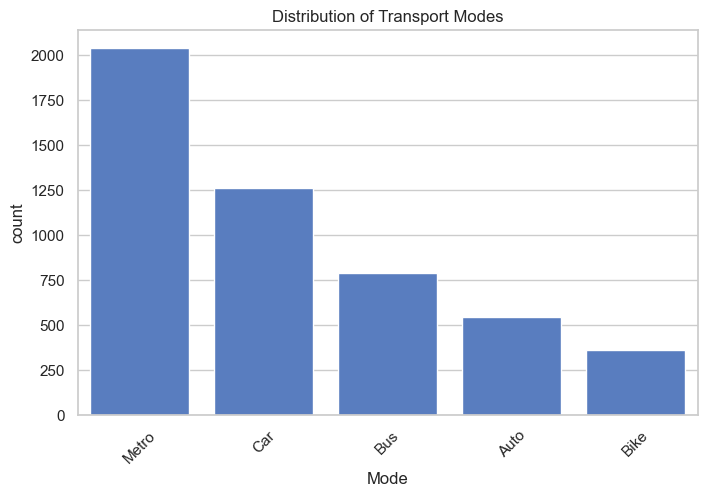

In [79]:
sns.set(style="whitegrid", palette="muted")
# 1. Distribution of Transport Modes
plt.figure(figsize=(8,5))
sns.countplot(x="Mode", data=dataset, order=dataset["Mode"].value_counts().index)
plt.title("Distribution of Transport Modes")
plt.xticks(rotation=45)
plt.show()

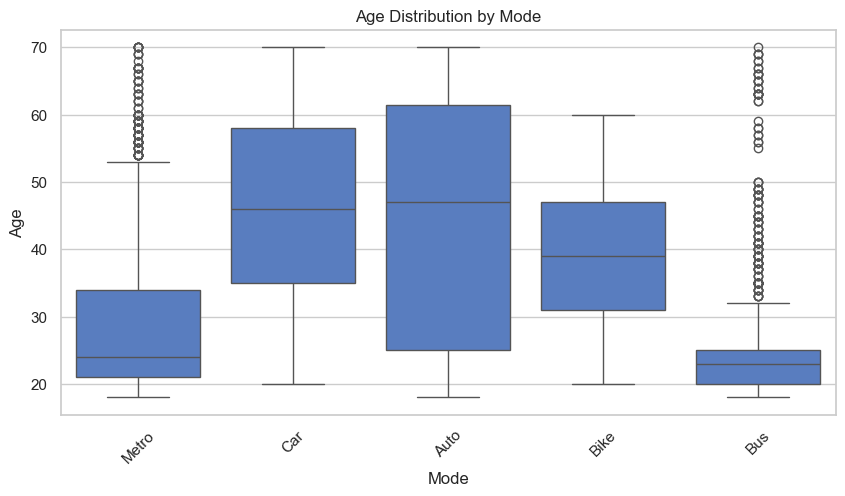

In [80]:
# 2. Age distribution across modes
plt.figure(figsize=(10,5))
sns.boxplot(x="Mode", y="Age", data=dataset)
plt.title("Age Distribution by Mode")
plt.xticks(rotation=45)
plt.show()

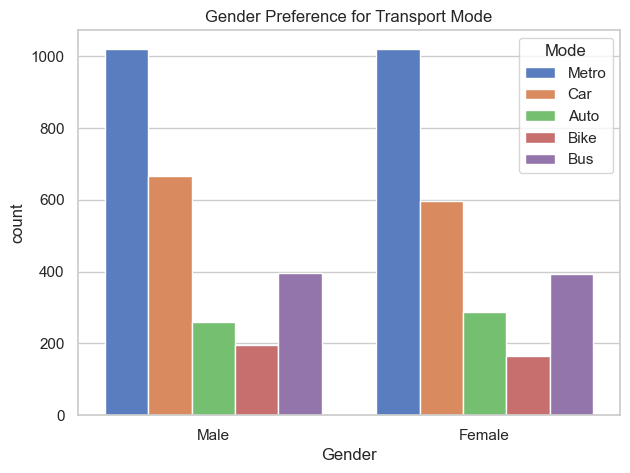

In [81]:
# 3. Gender vs Mode
plt.figure(figsize=(7,5))
sns.countplot(x="Gender", hue="Mode", data=dataset)
plt.title("Gender Preference for Transport Mode")
plt.show()

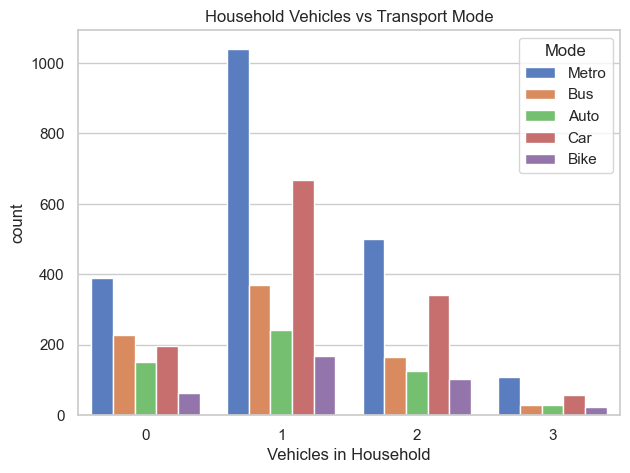

In [82]:
# 4. Vehicles in Household vs Mode
plt.figure(figsize=(7,5))
sns.countplot(x="Vehicles in Household", hue="Mode", data=dataset)
plt.title("Household Vehicles vs Transport Mode")
plt.show()

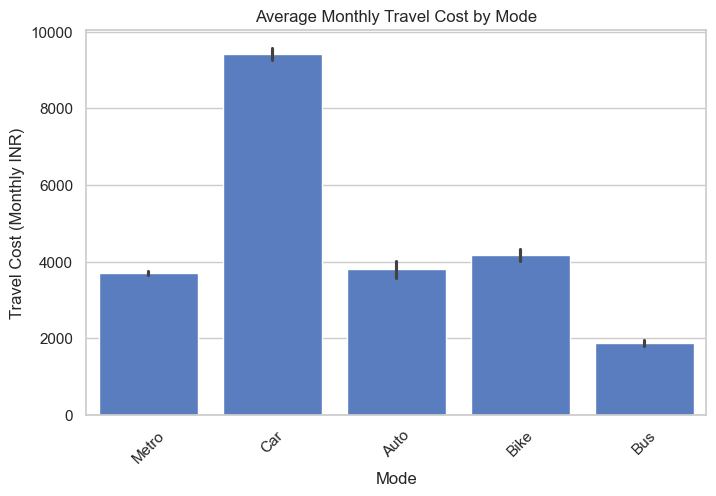

In [83]:
# 5. Average Monthly Travel Cost by Mode
plt.figure(figsize=(8,5))
sns.barplot(x="Mode", y="Travel Cost (Monthly INR)", data=dataset, estimator="mean")
plt.title("Average Monthly Travel Cost by Mode")
plt.xticks(rotation=45)
plt.show()

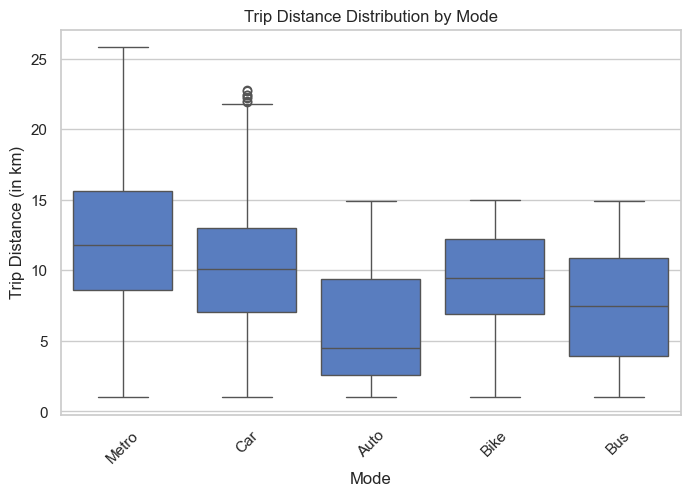

In [84]:
# 6. Effect of Trip Distance on Mode
plt.figure(figsize=(8,5))
sns.boxplot(x="Mode", y="Trip Distance (in km)", data=dataset)
plt.title("Trip Distance Distribution by Mode")
plt.xticks(rotation=45)
plt.show()

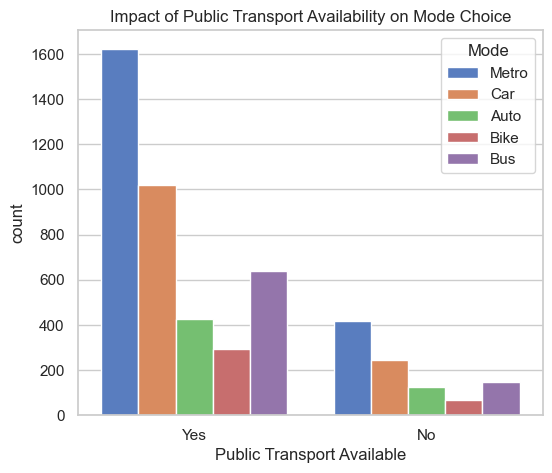

In [85]:
# 7. Public Transport Availability vs Mode
plt.figure(figsize=(6,5))
sns.countplot(x="Public Transport Available", hue="Mode", data=dataset)
plt.title("Impact of Public Transport Availability on Mode Choice")
plt.show()

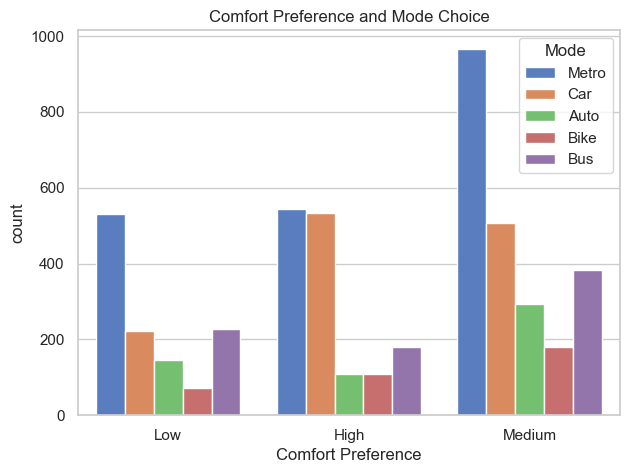

In [86]:
# 8. Comfort Preference vs Mode
plt.figure(figsize=(7,5))
sns.countplot(x="Comfort Preference", hue="Mode", data=dataset)
plt.title("Comfort Preference and Mode Choice")
plt.show()

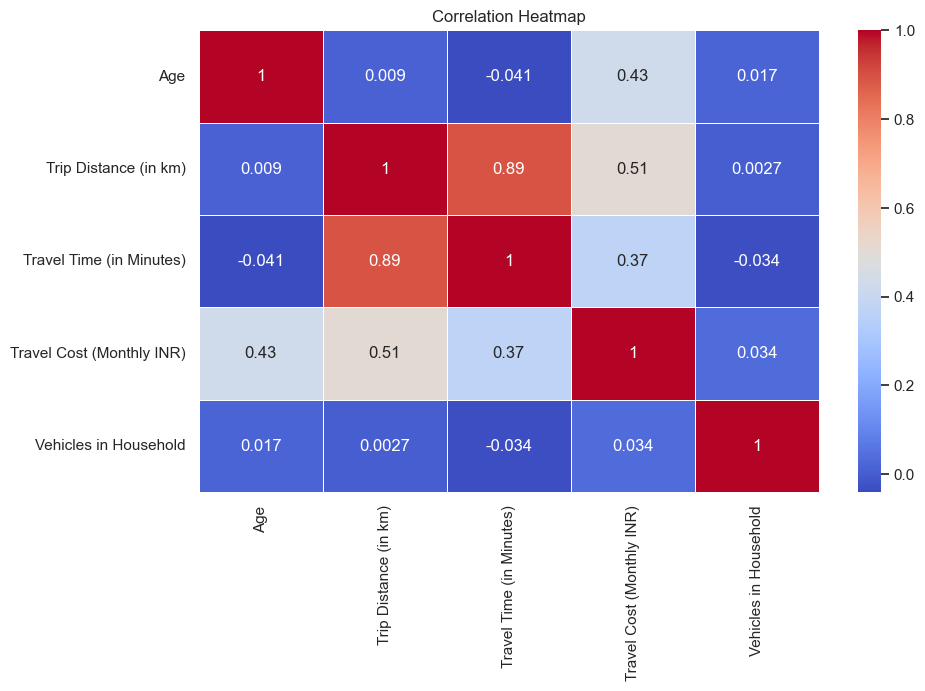

In [87]:
# 9. Correlation Heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

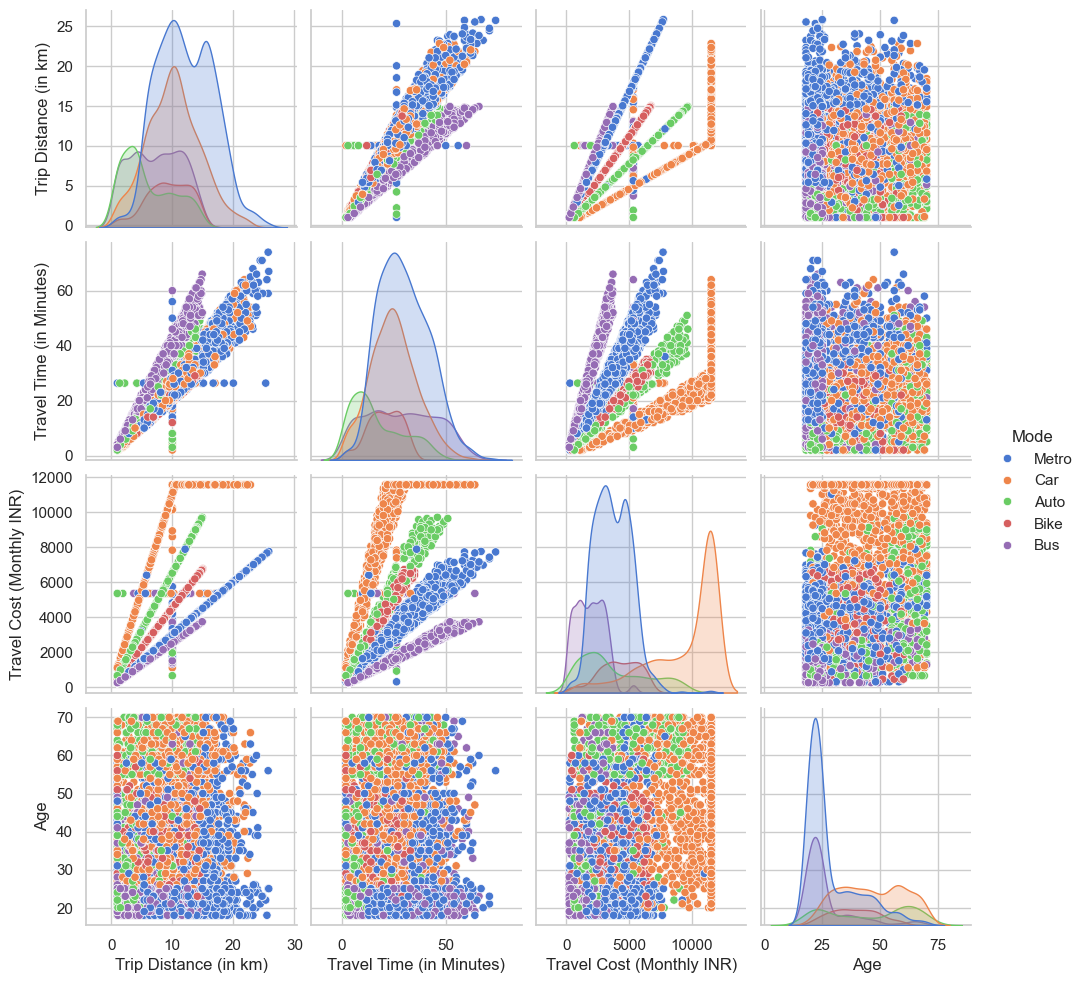

In [88]:
# 10. Pairplot for numeric features
sns.pairplot(dataset, vars=["Trip Distance (in km)", "Travel Time (in Minutes)", 
                       "Travel Cost (Monthly INR)", "Age"], hue="Mode")
plt.show()